# Modelling

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [2]:
df = pd.read_pickle("Data.pkl")
df.head()

,target,house_block_structure,house_in_complex,house_semi,house_backyard,house_room_flat,house_caravan_tent,house_other,school_attendance,satellite_tv,...,electricity,water_dwelling_institution,water_yard,lat,lon,NL,house_informal,lang_euro,water_community,person_household
ward,,,,,,,,,,,,,,,,,,,,,
41601001: Ward 1,16.773757,0.933841,0.000676,0.001372,0.005750,0.002823,0.001431,0.008224,0.260191,0.283468,...,0.919424,0.742692,0.214027,-29.682270,24.734743,0.292039,0.039546,0.845249,0.043281,3.516501
41601002: Ward 2,21.496661,0.696940,0.000000,0.001323,0.007575,0.001486,0.001253,0.008010,0.290228,0.103641,...,0.959259,0.309294,0.576844,-29.119311,24.757737,3.207775,0.275457,0.888100,0.113862,3.877587
41601003: Ward 3,10.931425,0.810545,0.003986,0.000956,0.006686,0.000000,0.000000,0.004150,0.186435,0.165772,...,0.826164,0.323393,0.483376,-29.142276,25.094093,0.000000,0.152534,0.581537,0.193231,3.025929
41601004: Ward 4,23.119257,0.659914,0.000000,0.037245,0.005255,0.000000,0.000000,0.002947,0.281229,0.087768,...,0.986151,0.677437,0.314194,-29.372052,24.942867,2.038778,0.287695,0.750342,0.008369,3.294194
41601005: Ward 5,13.652252,0.950575,0.000598,0.000818,0.004985,0.008693,0.000000,0.000673,0.196687,0.345975,...,0.957376,0.771106,0.194743,-29.409381,25.290165,0.000000,0.024532,0.436975,0.034150,3.846971


## Train/test split

In [3]:
y = df.target
df.drop(['target'], axis=1, inplace=True)
df.columns

Index(['house_block_structure', 'house_in_complex', 'house_semi',
       'house_backyard', 'house_room_flat', 'house_caravan_tent',
       'house_other', 'school_attendance', 'satellite_tv', 'has_car',
       'landline_ownership', 'lang_isiNdebele', 'lang_isiXhosa',
       'lang_isiZulu', 'lang_sepedi', 'lang_sesotho', 'lang_setswana',
       'lang_sign', 'lang_siSwati', 'lang_tshivenda', 'lang_xitsonga',
       'lang_other', 'race_black', 'race_coloured', 'race_indian_asian',
       'race_white', 'race_other', 'electricity', 'water_dwelling_institution',
       'water_yard', 'lat', 'lon', 'NL', 'house_informal', 'lang_euro',
       'water_community', 'person_household'],
      dtype='object')

The test size is going to be 30% of the data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
print('Training set has', X_train.shape[0], 'rows')
print('Test set has', X_test.shape[0], 'rows')

Training set has 1974 rows
Test set has 847 rows


## Model: LinearRegression

Fitting the model

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
model.coef_

array([-3.81867829e+00, -1.28278613e+00, -2.77204166e+00, -1.37478430e+01,
       -3.05907135e+01, -2.20020663e+01, -2.89425838e+01,  6.01600913e+01,
       -3.14090072e+00, -3.61767877e+01,  1.89254791e+01, -1.72547893e+01,
       -1.75945583e+01, -1.70899618e+01, -1.42271738e+01, -1.30854706e+01,
       -1.74370787e+01, -2.38560150e+01, -1.74396328e+01, -1.68659367e+01,
       -1.39220244e+01, -3.15654747e+01, -3.26641463e+07, -3.26641455e+07,
       -3.26641401e+07, -3.26641371e+07, -3.26641479e+07,  3.84985829e+00,
        3.87237570e+06,  3.87238028e+06,  3.40674947e-01,  8.01718802e-02,
       -4.23754512e-02, -9.37811135e+00, -1.79693665e+01,  3.87238284e+06,
       -7.77387184e-01])

## Model evaluation

In [7]:
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f'Mean squared Error: {mean_squared_error(y_true=y_test, y_pred=y_pred)}')
print(f'Mean absolute Error: {mean_absolute_error(y_true=y_test, y_pred=y_pred)}')
print(f'R2 score: {r2_score(y_true=y_test, y_pred=y_pred)}')

Mean squared Error: 15.087435426944944
Mean absolute Error: 2.981807832097406
R2 score: 0.8557014067535601


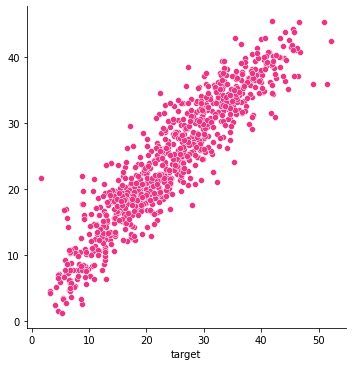

In [9]:
sns.relplot(x=y_test, y=y_pred, kind="scatter", color='#eb3483')

## Cross validation

In [10]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=model, X=df, y=y, scoring="r2", cv=10)
cv_scores

array([0.74524906, 0.73248579, 0.83155631, 0.76524495, 0.6439998 ,
       0.87668121, 0.78907179, 0.80551398, 0.82313255, 0.741418  ])

In [11]:
cv_scores.mean()

0.7754353445339166

This model has a constant R2 value between tests. It has a relatively good score too